# Movies by Genres
> How many movie genres have I really watched?

- toc:true
- badges: true
- author: Sanyam Kapoor
- categories: [movies, barplot, heatmap]

In [1]:
#collapse-hide

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2., style='whitegrid')

In [2]:
#collapse-hide

import sys
from pathlib import Path

plotfiles_module_path = Path('.') / '..' / 'src'

if plotfiles_module_path not in sys.path:
  sys.path.insert(0, str(plotfiles_module_path.resolve()))

from plotfiles.dataset import load_movies

movies = load_movies()

In [3]:
#collapse-hide

id2genre = pd.DataFrame(movies.genres.tolist(), index=movies.id).stack()
id2genre = id2genre.reset_index([0, 'id']).rename(columns={0: 'genre'})

count_by_genre = id2genre.groupby('genre').count().reset_index()

## Number of Movies Watched by Genres

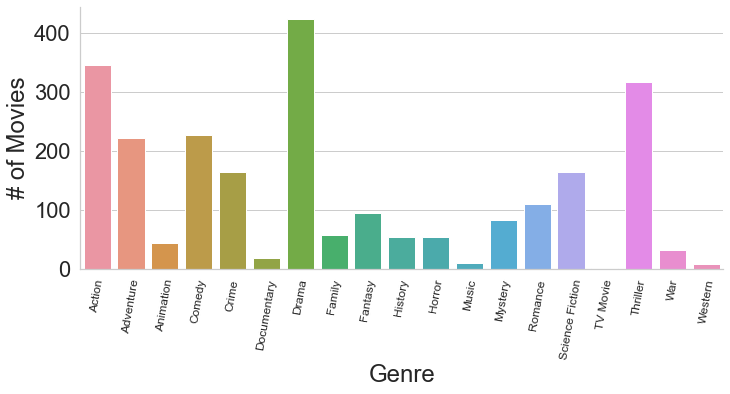

In [4]:
#collapse-hide

g = sns.catplot(data=count_by_genre, x='genre', y='id', kind='bar',
                dodge=False, height=6, aspect=16/9)

g.set_xticklabels(g.ax.get_xticklabels(), rotation=80, fontdict=dict(size=12))
g.set(xlabel='Genre', ylabel='# of Movies')
g.fig.tight_layout()

## Distribution of Genres by Year

In [5]:
#collapse-hide

genre_year = id2genre.merge(movies[['id', 'release_year']], on='id', how='inner')
genre_year = genre_year.groupby(['genre', 'release_year']).count().reset_index()
genre_year = genre_year.pivot('release_year', 'genre', 'id')
genre_year = genre_year.replace(float('NaN'), 0.).astype(int)

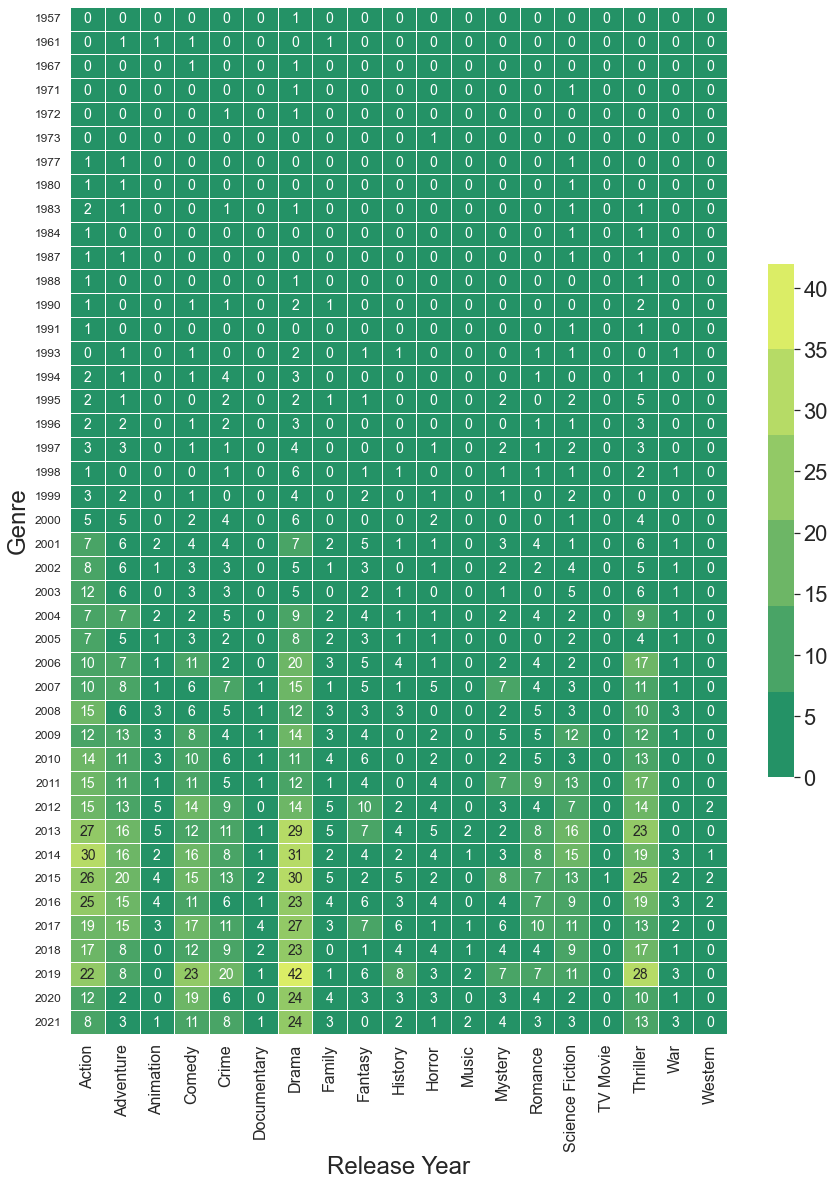

In [6]:
#collapse-hide

fig, ax = plt.subplots(figsize=(13, 17))
g = sns.heatmap(data=genre_year, ax=ax, fmt='d', linewidths=1.,
                annot=True, annot_kws=dict(fontsize=14),
                cbar=True, cbar_kws=dict(shrink=.5),
                yticklabels=genre_year.index,
                cmap=sns.color_palette('summer'))
g.set(xlabel='Release Year', ylabel='Genre')
g.set_xticklabels(g.get_xticklabels(), fontdict=dict(size=16))
g.set_yticklabels(g.get_yticklabels(), fontdict=dict(size=12))
fig.tight_layout()